In [3]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install matplotlib
!pip install numpy
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install torch-scatter
!pip install torch-sparse
!pip install torch-geometric

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

import random
import math
import time
import numpy as np

import torch_geometric
import torch_geometric.nn as nn

import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [ ]:
FINAL_FEATURES_FRIENDS

df_all_sequence_trainset = pd.read_csv("data/FINAL_ALL_SEQUENCES_TRAINTEST.tsv", sep='\t')

In [ ]:
df_final_features_friends = pd.read_table("data/FINAL_FEATURES_FRIENDS.tsv")

In [3]:
df_final_sequence_matrix = pd.read_csv("data/FINAL_SEQUENCES_MATRIX.tsv", sep='\t')

In [4]:
df_final_sequence_matrix.head()

,SESSIONS_SEQUENCES
0,"['68a9902529901882ecd5143460468d4c', '79d75347..."
1,['72b88f72bca2636844bb14b9cd9e29b3']
2,"['b496d19eb25556bd64e481d11b6f7dd6', 'd21918bb..."
3,"['dcb3d50673073d3c023db102f21b2d3e', '09a5d816..."
4,"['3de59e26ee7e94a6ccd0a2eead2fab9a', '4a51f13a..."


In [2]:
df_final_targets_dates_traintest = pd.read_csv("data/FINAL_TARGETS_DATES_TRAINTEST.tsv", sep='\t')

In [3]:
df_final_targets_dates_traintest.head(10)

,CLIENT_ID,RETRO_DT,TARGET
0,1011725,20210501,0
1,1018784,20210501,1
2,1021812,20210501,0
3,1024003,20210501,0
4,1025140,20210501,test
5,1026390,20210501,1
6,1027507,20210501,1
7,1028552,20210501,0
8,1029732,20210501,test
9,1036872,20210501,0


In [4]:
df_final_targets_dates_traintest.shape

(159290, 3)

In [5]:
df_final_targets_dates_traintest = df_final_targets_dates_traintest.drop('RETRO_DT', axis=1)

In [6]:
df_final_targets_dates_traintest.head(10)

,CLIENT_ID,TARGET
0,1011725,0
1,1018784,1
2,1021812,0
3,1024003,0
4,1025140,test
5,1026390,1
6,1027507,1
7,1028552,0
8,1029732,test
9,1036872,0


In [7]:
df_final_targets_testset = pd.DataFrame(columns = ['CLIENT_ID', 'TARGET'])

In [8]:
remove_data = []
for i in range(len(df_final_targets_dates_traintest['CLIENT_ID'])//3):
    if (df_final_targets_dates_traintest['TARGET'][i] == 'test'):
        remove_data.append(i)

df_final_targets_dates_traintest.drop(remove_data, axis=0, inplace=True)

In [9]:
df = df_final_targets_dates_traintest[:50]
df

,CLIENT_ID,TARGET
0,1011725,0
1,1018784,1
2,1021812,0
3,1024003,0
5,1026390,1
6,1027507,1
7,1028552,0
9,1036872,0
10,1041608,0
11,1045369,1


In [8]:
!python3 -m pip install networkx as nx

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [10]:
import networkx as nx

In [11]:
G = nx.from_pandas_edgelist(df, 'CLIENT_ID', 'TARGET')

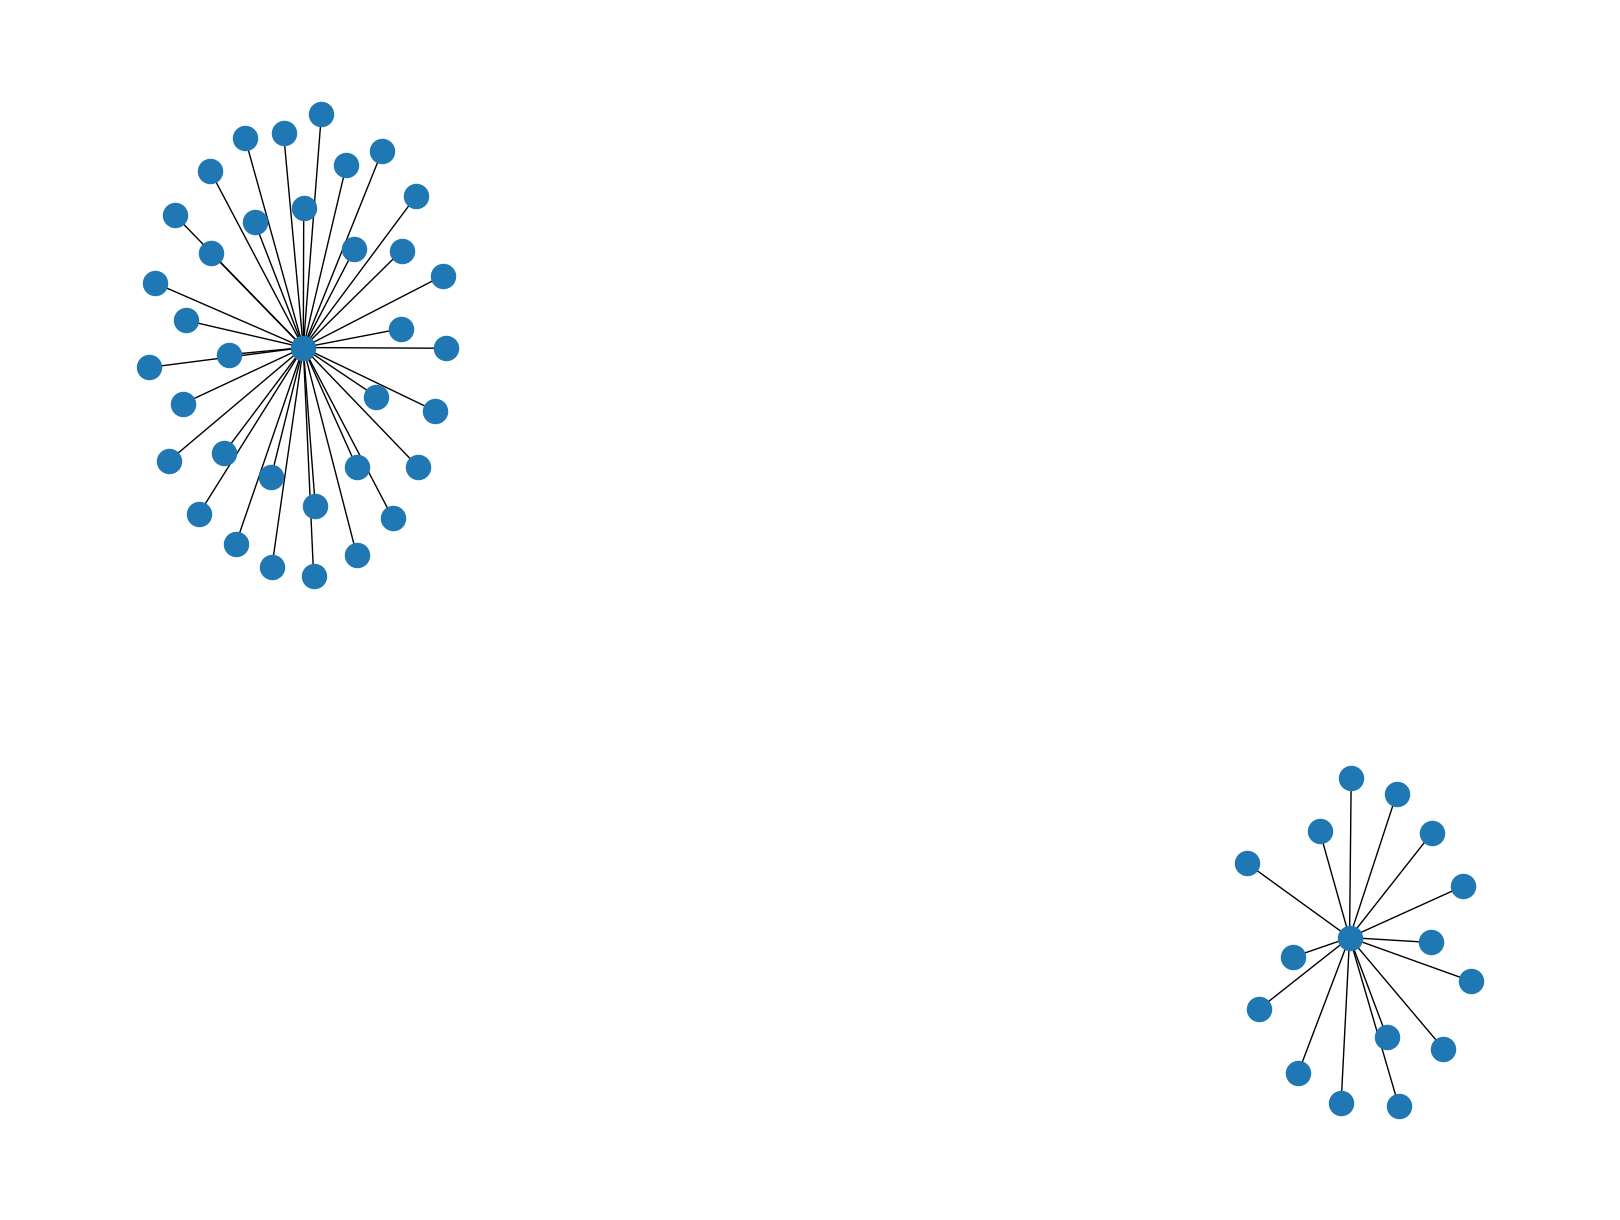

In [12]:
nx.draw(G)

In [4]:
def construct_graph(data_encoded,light=False):
    node_features_list=list(data_encoded.values())
    node_features=torch.tensor(node_features_list)
    node_labels=torch.tensor(target_df['ml_target'].values)
    edges_list=edges.values.tolist()
    edge_index01=torch.tensor(edges_list, dtype = torch.long).T
    edge_index02=torch.zeros(edge_index01.shape, dtype = torch.long)#.T
    edge_index02[0,:]=edge_index01[1,:]
    edge_index02[1,:]=edge_index01[0,:]
    edge_index0=torch.cat((edge_index01,edge_index02),axis=1)
    g = Data(x=node_features, y=node_labels, edge_index=edge_index0)
    g_light = Data(x=node_features[:,0:2],
                     y=node_labels   ,
                     edge_index=edge_index0[:,:55])
    if light:
        return(g_light)
    else:
        return(g)

In [5]:
def draw_graph(data0):
    #node_labels=data0.y
    if data0.num_nodes>100:
        print("This is a big graph, can not plot...")
        return

    else:
        data_nx = to_networkx(data0)
        node_colors=data0.y[list(data_nx.nodes)]
        pos= nx.spring_layout(data_nx,scale =1)
        plt.figure(figsize=(12,8))
        nx.draw(data_nx, pos,  cmap=plt.get_cmap('Set1'),
                node_color =node_colors,node_size=600,connectionstyle="angle3",
                width =1, with_labels = False, edge_color = 'k', arrowstyle = "-")

In [1]:
pip install torch-spline-conv -f https://data.pyg.org/whl/torch-1.12.0+cpu.html

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://data.pyg.org/whl/torch-1.12.0+cpu.html
     |████████████████████████████████| 122 kB 3.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [ ]:
'''Model
We apply a SplineCNN architecture with 6 convolutional layers:
SConv((k1, k2, k3),1,32) → SConv((k1, k2, k3),32,64) →
4× SConv((k1, k2, k3),64,64) → Lin(256) → Lin(6890)
'''

In [2]:
from torch_spline_conv import spline_conv

In [1]:
class SocialSplineCNN(torch.nn.Module):
    def __init__(self, num_of_feat, f):
        super(SocialSplineCNN, self).__init__()
        k1, k2, k3 = 5
        self.conv1 = spline_conv((k1, k2, k3), 1, 32)
        self.conv2 = spline_conv((k1, k2, k3), 32, 64)
        self.conv_mas = spline_conv((k1, k2, k3), 64, 64)
        
        
    def forward(self, data):
        x = data.x.float()
        edge_index = data.edge_index
        x = self.conv1(x=x, edge_index=edge_index)
        x = nn.ELU(x)
        x = self.conv2(x, edge_index)
        x = nn.ELU(x)
        x = self.conv_mas()
        return x

NameError: name 'torch' is not defined

In [ ]:
def masked_loss(predictions,labels,mask):
    mask=mask.float()
    mask=mask/torch.mean(mask)
    loss=criterion(predictions,labels)
    loss=loss*mask
    loss=torch.mean(loss)
    return (loss)    

def masked_accuracy(predictions,labels,mask):
    mask=mask.float()
    mask/=torch.mean(mask)
    accuracy=(torch.argmax(predictions,axis=1)==labels).long()
    accuracy=mask*accuracy
    accuracy=torch.mean(accuracy)
    return (accuracy)

In [ ]:
def train_social(net,data,epochs=10,lr=0.01):
    optimizer = torch.optim.Adam(net.parameters(), lr=lr) # 00001
    best_accuracy=0.0

    train_losses=[]
    train_accuracies=[]

    val_losses=[]
    val_accuracies=[]
    test_losses=[]
    test_accuracies=[]

    for ep in range(epochs+1):
        optimizer.zero_grad()
        out=net(data)
        loss=masked_loss(predictions=out,
                         labels=data.y,
                         mask=data.train_mask)
        loss.backward()
        optimizer.step()
        train_losses+=[loss]
        train_accuracy=masked_accuracy(predictions=out,
                                       labels=data.y, 
                                       mask=data.train_mask)
        train_accuracies+=[train_accuracy]

        val_loss=masked_loss(predictions=out,
                             labels=data.y, 
                             mask=data.val_mask)
        val_losses+=[val_loss]
        val_accuracy=masked_accuracy(predictions=out,
                                     labels=data.y, 
                                     mask=data.val_mask)
        val_accuracies+=[val_accuracy]

        test_accuracy=masked_accuracy(predictions=out,
                                      labels=data.y, 
                                      mask=data.test_mask)
        test_accuracies+=[test_accuracy]
        if np.round(val_accuracy,4)> np.round(best_accuracy ,4):
            print("Epoch {}/{}, Train_Loss: {:.4f}, Train_Accuracy: {:.4f}, Val_Accuracy: {:.4f}, Test_Accuracy: {:.4f}"
                      .format(ep+1,epochs, loss.item(), train_accuracy, val_accuracy,  test_accuracy))
            best_accuracy=val_accuracy
            
        plt.plot(train_losses)  
    plt.plot(val_losses)
    plt.plot(test_losses)  
    plt.show()

    plt.plot(train_accuracies) 
    plt.plot(val_accuracies)
    plt.plot(test_accuracies) 
    plt.show()

In [ ]:
num_of_feat=g.num_node_features
net=SocialSplineCNN(num_of_feat=num_of_feat,f=16)
criterion=nn.CrossEntropyLoss()
train_social(net,g,epochs=100,lr=0.01, dropout=0.5)

In [ ]:
import torch
from torch_spline_conv import spline_conv

x = torch.rand((4, 2), dtype=torch.float)  # 4 nodes with 2 features each
edge_index = torch.tensor([[0, 1, 1, 2, 2, 3], [1, 0, 2, 1, 3, 2]])  # 6 edges
pseudo = torch.rand((6, 2), dtype=torch.float)  # two-dimensional edge attributes
weight = torch.rand((25, 2, 4), dtype=torch.float)  # 25 parameters for in_channels x out_channels
kernel_size = torch.tensor([5, 5])  # 5 parameters in each edge dimension
is_open_spline = torch.tensor([1, 1], dtype=torch.uint8)  # only use open B-splines
degree = 1  # B-spline degree of 1
norm = True  # Normalize output by node degree.
root_weight = torch.rand((2, 4), dtype=torch.float)  # separately weight root nodes
bias = None  # do not apply an additional bias

out = spline_conv(x, edge_index, pseudo, weight, kernel_size,
                  is_open_spline, degree, norm, root_weight, bias)

print(out.size())
torch.Size([4, 4])  # 4 nodes with 4 features each